##   BUSINESS DECISION 

In [19]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_retailer = pd.read_csv('retailer.csv')

In [ ]:
df_retailer.shape

(9866049, 7)

In [ ]:
df_retailer.head(10)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN
3,reTjziox2cSrxVq70Y,2024-02-28 04:30:42,Product Page View,Science Diet,SD Fel Adt HBC OFEnt 24x5.5oz cs,NaN,NaN
4,reOrpt9vhSwhbPVtni,2024-06-01 22:22:30,Product Page View,NaN,NaN,NaN,NaN
5,reOrpt9vhSwhbPVtni,2024-06-01 22:36:26,Product Page View,Science Diet,SD Ca Adt Lt Ckn 30lb bg,NaN,NaN
6,reOrpt9vhSwhbPVtni,2024-06-01 22:43:07,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
7,reOrpt9vhSwhbPVtni,2024-06-20 14:02:48,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
8,reOrpt9vhSwhbPVtni,2024-06-06 10:38:51,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0
9,reOrpt9vhSwhbPVtni,2024-06-01 22:47:09,Add to cart,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN


In [ ]:
df_retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866049 entries, 0 to 9866048
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    object 
 1   timestamp_utc  object 
 2   event_name     object 
 3   brand          object 
 4   product_name   object 
 5   sales          float64
 6   quantity       float64
dtypes: float64(2), object(5)
memory usage: 526.9+ MB


In [24]:
df_retailer['timestamp_utc'] = pd.to_datetime(df_retailer['timestamp_utc'])
df_retailer['date'] = df_retailer['timestamp_utc'].dt.date

In [ ]:
col1 = ['event_name', 'brand']

for c in col1:
    print(f"\n=== {c} ===")
    print(df_retailer[c].unique())



=== event_name ===
['Product Page View' 'Order' 'Add to cart']

=== brand ===
[nan 'Science Diet' 'Hills' 'Prescription Diet']


In [37]:
kpis_base = {
    "n_events": len(df_retailer),
    "n_customers": df_retailer["customer_id"].nunique(),
    "n_products": df_retailer["product_name"].nunique(),
    "n_brands": df_retailer["brand"].value_counts().to_dict(),
    "event_distribution": df_retailer["event_name"].value_counts().to_dict()
}

kpis_base


{'n_events': 9866049,
 'n_customers': 1354584,
 'n_products': 505,
 'n_brands': {'Science Diet': 7858536,
  'Prescription Diet': 1247520,
  'Hills': 482753},
 'event_distribution': {'Product Page View': 6376627,
  'Add to cart': 2050111,
  'Order': 1439311}}

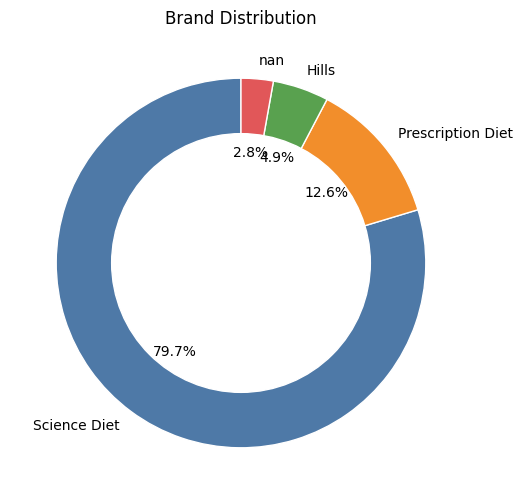

In [38]:
brand_dist = df_retailer["brand"].value_counts(dropna=False)

labels = brand_dist.index.astype(str)
sizes  = brand_dist.values
colors = ["#4E79A7", "#F28E2B", "#59A14F", "#E15759"]  # 4 couleurs

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90,
        wedgeprops={'linewidth':1, 'edgecolor':'white'})
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Brand Distribution")
plt.show()

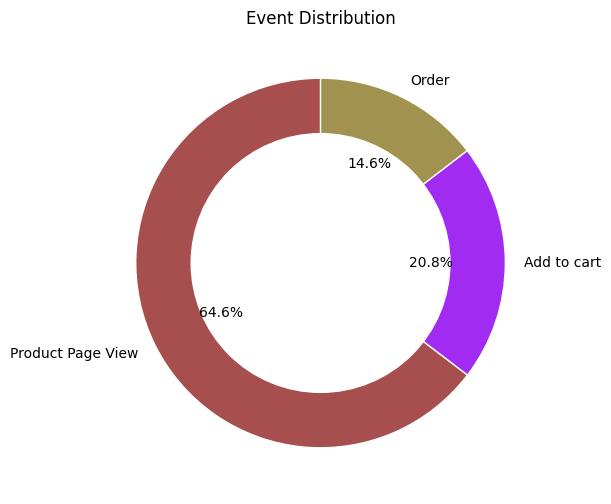

In [ ]:

labels = list(kpis_base["event_distribution"].keys())
sizes  = list(kpis_base["event_distribution"].values())
colors = ["#A74E4E", "#A22BF2", "#A1934F"] 
plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=90,
    wedgeprops={'linewidth':1,'edgecolor':'white'}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Event Distribution")
plt.show()


In [ ]:
df_freq_clients = df_retailer['customer_id'].value_counts().reset_index()
df_freq_clients.columns = ['customer_id', 'frequency']
df_freq_clients

,customer_id,frequency
0,unknown,194530
1,reth7mdoDJCbkDalaK,6190
2,reJZhNiD0cXQyewGn3,5658
3,reHQRAI2c9b35Tij3O,2230
4,rejr2YF7XyHh2RavMT,2081
...,...,...
1354579,re4j5Kk86B1uunxSLJ,1
1354580,reJRLE6SzA8kzVVG4S,1
1354581,rerWAZSpigQx5UnZMZ,1
1354582,reBda2QsASNpnCCjNY,1


C:\Users\nouts\AppData\Local\Temp\ipykernel_32520\2531874558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


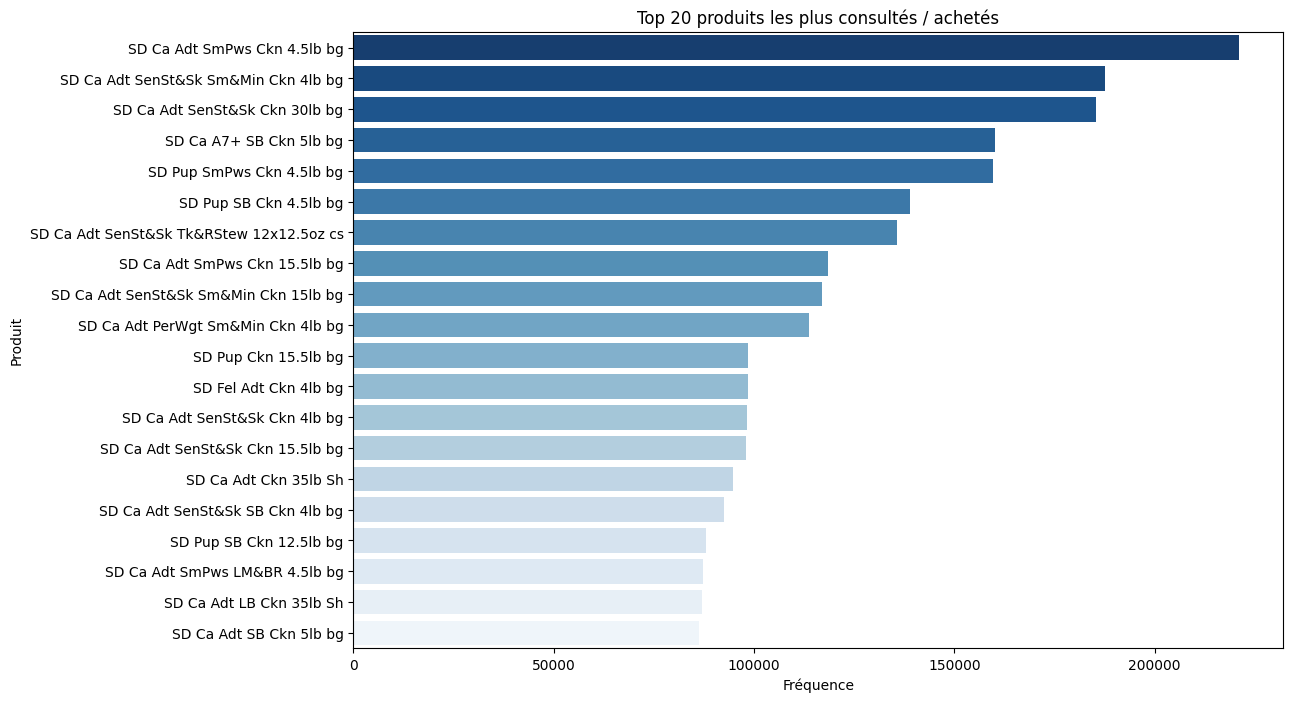

In [ ]:
top_products = df_retailer['product_name'].value_counts().head(20)

top_products_df = top_products.reset_index()
top_products_df.columns = ['product_name', 'frequency']

top_products_df

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(
    data=top_products_df,
    y='product_name',
    x='frequency',
    palette='Blues_r'
)
plt.title("Top 20 produits les plus consultés / achetés")
plt.xlabel("Fréquence")
plt.ylabel("Produit")
plt.show()


In [ ]:
top_view = (
    df_retailer[df_retailer['event_name'] == 'Product Page View']
    ['product_name']
    .value_counts()
    .head(20)
)

top_view


product_name
SD Ca Adt SmPws Ckn 4.5lb bg                136386
SD Ca Adt SenSt&Sk Ckn 30lb bg              123588
SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg        105151
SD Pup SmPws Ckn 4.5lb bg                    97807
SD Ca A7+ SB Ckn 5lb bg                      86816
SD Pup SB Ckn 4.5lb bg                       82612
SD Ca Adt SmPws Ckn 15.5lb bg                77847
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg        77389
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs     72458
SD Ca Adt PerWgt Sm&Min Ckn 4lb bg           67759
SD Ca Adt SenSt&Sk Ckn 4lb bg                63871
SD Ca Adt Ckn 35lb Sh                        63850
SD Ca Adt SenSt&Sk Ckn 15.5lb bg             61907
SD Pup Ckn 15.5lb bg                         59020
SD Ca Adt PerWgt Ckn 4lb bg                  58743
SD Ca Adt SenSt&Sk SB Ckn 4lb bg             58507
SD Fel Adt Ckn 4lb bg                        57563
SD Ca Adt LB Ckn 35lb Sh                     55635
SD Ca Adt SmPws LM&BR 4.5lb bg               54584
SD Pup SB Ckn 12.5

In [ ]:
top_add = (
    df_retailer[df_retailer['event_name'] == 'Add to cart']
    ['product_name']
    .value_counts()
    .head(20)
)

top_add


product_name
SD Ca Adt SmPws Ckn 4.5lb bg                49057
SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg        47502
SD Ca A7+ SB Ckn 5lb bg                     41756
SD Pup SmPws Ckn 4.5lb bg                   36717
SD Ca Adt SenSt&Sk Ckn 30lb bg              36012
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs    35412
SD Pup SB Ckn 4.5lb bg                      32731
SD Ca Adt PerWgt Sm&Min Ckn 4lb bg          26393
SD Ca Adt SmPws Ckn 15.5lb bg               23996
SD Fel Adt Ckn 4lb bg                       23627
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg       23445
SD Pup Ckn 15.5lb bg                        22855
SD Ca Adt SenSt&Sk Ckn 15.5lb bg            20773
SD Ca Adt SenSt&Sk Ckn 12x12.8oz cs         20631
HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs      20558
SD Pup SB Ckn 12.5lb bg                     20305
SD Ca Adt SB Ckn 5lb bg                     19926
SD Ca Adt SenSt&Sk SB Ckn 4lb bg            19742
SD Ca Adt SenSt&Sk Ckn 4lb bg               19510
SD Ca Adt PerWgt Vg&CknStew 12x12.5oz

In [ ]:
top_orders = (
    df_retailer[df_retailer['event_name'] == 'Order']
    ['product_name']
    .value_counts()
    .head(20)
)

top_orders


product_name
SD Ca Adt SmPws Ckn 4.5lb bg                35600
SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg        34918
SD Ca A7+ SB Ckn 5lb bg                     31465
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs    27854
SD Ca Adt SenSt&Sk Ckn 30lb bg              25833
SD Pup SmPws Ckn 4.5lb bg                   25181
SD Pup SB Ckn 4.5lb bg                      23615
SD Ca Adt PerWgt Sm&Min Ckn 4lb bg          19533
SD Fel Adt Ckn 4lb bg                       17242
HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs      16773
SD Ca Adt SmPws Ckn 15.5lb bg               16746
SD Pup Ckn 15.5lb bg                        16676
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg       16220
SD Ca Adt SenSt&Sk Ckn 12x12.8oz cs         15940
SD Ca Adt PerWgt Vg&CknStew 12x12.5oz cs    15505
SD Ca Adt SenSt&Sk Ckn 15.5lb bg            15358
HI Ca GF SBkNat Bf&SwtPot 12x8oz cs         15048
SD Pup SB Ckn 12.5lb bg                     15013
SD Ca Adt SenSt&Sk Ckn 4lb bg               14901
SD Ca Adt SB Ckn 5lb bg              

In [18]:
# Calculate total quantity sold by product
quantity_by_product = df_retailer.groupby('product_name')['quantity'].sum().sort_values(ascending=False)
quantity_by_product.head(20)

product_name
SD Ca Adt SmPws Ckn 4.5lb bg                36662.0
SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg        36044.0
SD Ca A7+ SB Ckn 5lb bg                     32650.0
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs    32068.0
SD Ca Adt SenSt&Sk Ckn 30lb bg              26323.0
SD Pup SmPws Ckn 4.5lb bg                   26151.0
SD Pup SB Ckn 4.5lb bg                      25305.0
HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs      21693.0
SD Ca Adt PerWgt Sm&Min Ckn 4lb bg          20309.0
HI Ca GF SBkNat Bf&SwtPot 12x8oz cs         18337.0
SD Ca Adt PerWgt Vg&CknStew 12x12.5oz cs    18309.0
HI Ca GF SBkNat Ckn&Car 12x8oz cs           17745.0
SD Ca Adt SenSt&Sk Ckn 12x12.8oz cs         17725.0
SD Fel Adt Ckn 4lb bg                       17718.0
SD Ca Adt SmPws Ckn 15.5lb bg               17049.0
SD Pup Ckn 15.5lb bg                        16979.0
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg       16476.0
SD Ca Adt PftDig CknVegRStw 12x12.8oz cs    16193.0
SD Ca Adt SenSt&Sk Ckn 4lb bg               15700.0

In [ ]:
 #             SOS

product_stats = df_retailer.pivot_table(
    index='product_name',
    columns='event_name',
    values='customer_id',
    aggfunc='count'
)

product_stats = product_stats.fillna(0)

product_stats['cart_rate'] = product_stats['Add to cart'] / product_stats['Product Page View']
product_stats['order_rate'] = product_stats['Order'] / product_stats['Product Page View']
product_stats['conversion_cart_to_order'] = product_stats['Order'] / product_stats['Add to cart']

product_stats.sort_values('order_rate', ascending=False).head(20)


event_name,Add to cart,Order,Product Page View,cart_rate,order_rate,conversion_cart_to_order
product_name,,,,,,
HI Ca NatJkySt Bf 12x7.1oz cs,4835.0,4234.0,6017.0,0.803557,0.703673,0.875698
HI Ca Nat FlxStxT Tk 12x7.1oz cs,4543.0,3830.0,5619.0,0.808507,0.681616,0.843055
HI Ca NatJkySt Ckn 12x7.1oz cs,4795.0,4055.0,6347.0,0.755475,0.638885,0.845673
HI Ca Nat FlxStxT Bf 12x7.1oz cs,7860.0,6384.0,10452.0,0.752009,0.610792,0.812214
HI Ca Nat CrnFrty Cr&Oat 12x8oz cs,4577.0,3684.0,6447.0,0.709943,0.571429,0.804894
HI Ca GF SBkNat Ckn&Car 12x8oz cs,15519.0,13248.0,24186.0,0.641652,0.547755,0.853663
HI Ca Nat SSav T Bf&Ched 12x8.0oz cs,6033.0,5074.0,9645.0,0.625505,0.526076,0.841041
HI Ca NatJkySt Mini Ckn 12x7.1oz cs,1065.0,1022.0,1972.0,0.540061,0.518256,0.959624
HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs,20558.0,16773.0,33200.0,0.619217,0.505211,0.815887
